In [72]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split

In [73]:
df = pd.read_csv(filepath_or_buffer='marketing_campaign.csv', sep = '	')

In [74]:
df.shape

(2240, 29)

In [75]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [76]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [78]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [79]:
df.fillna(0, inplace = True)

In [80]:
df['Income'].isnull().sum()

0

In [81]:
# Количество вариаций уникальных объектов в столбцах
print(df[df.select_dtypes(object).columns].nunique())

Education           5
Marital_Status      8
Dt_Customer       663
dtype: int64


In [82]:
print(df.select_dtypes(object).columns)

Index(['Education', 'Marital_Status', 'Dt_Customer'], dtype='object')


In [83]:
# Просто показываем значения уникальные, которые идут вразрез с форматом наших данных
categorical_columns=list(df.select_dtypes(object).columns)
data_unique=[]
for col in df[df.select_dtypes(object).columns]:
    data_unique.append(df[col].unique())
print(data_unique)

[array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object), array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object), array(['04-09-2012', '08-03-2014', '21-08-2013', '10-02-2014',
       '19-01-2014', '09-09-2013', '13-11-2012', '08-05-2013',
       '06-06-2013', '13-03-2014', '15-11-2013', '10-10-2012',
       '24-11-2012', '24-12-2012', '31-08-2012', '28-03-2013',
       '03-11-2012', '08-08-2012', '06-01-2013', '23-12-2012',
       '11-01-2014', '18-03-2013', '02-01-2013', '27-05-2013',
       '20-02-2013', '31-05-2013', '22-11-2013', '22-05-2014',
       '11-05-2013', '29-10-2012', '29-08-2013', '31-12-2013',
       '02-09-2013', '11-02-2014', '01-02-2013', '29-04-2013',
       '12-03-2013', '05-11-2013', '02-10-2013', '28-06-2014',
       '09-11-2012', '24-05-2013', '01-01-2014', '08-11-2012',
       '12-05-2014', '11-08-2012', '07-06-2014', '12-06-2013',
       '19-11-2012', '02-04-2013', '28-04-2014', '17-06-2

In [84]:
df_tmp = df[['Dt_Customer','Education', 'Marital_Status']]
print(df_tmp)

     Dt_Customer   Education Marital_Status
0     04-09-2012  Graduation         Single
1     08-03-2014  Graduation         Single
2     21-08-2013  Graduation       Together
3     10-02-2014  Graduation       Together
4     19-01-2014         PhD        Married
...          ...         ...            ...
2235  13-06-2013  Graduation        Married
2236  10-06-2014         PhD       Together
2237  25-01-2014  Graduation       Divorced
2238  24-01-2014      Master       Together
2239  15-10-2012         PhD        Married

[2240 rows x 3 columns]


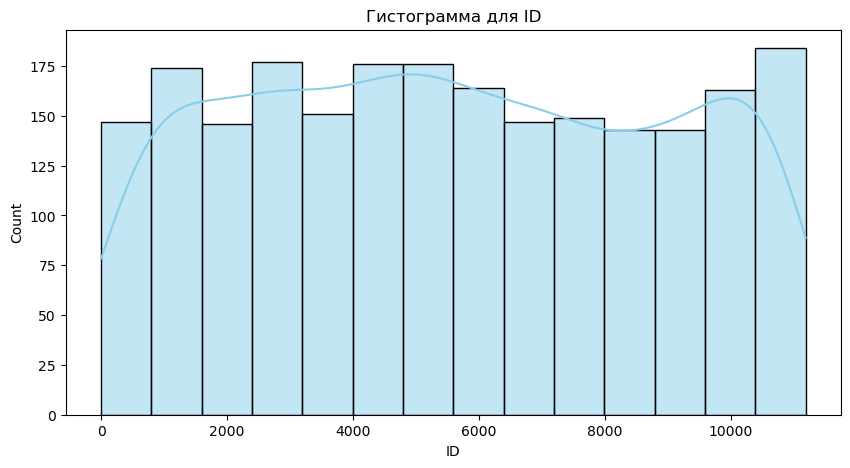

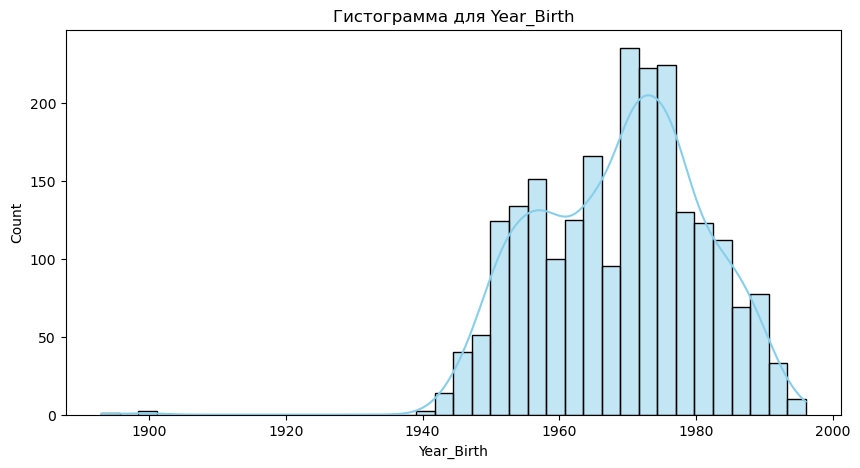

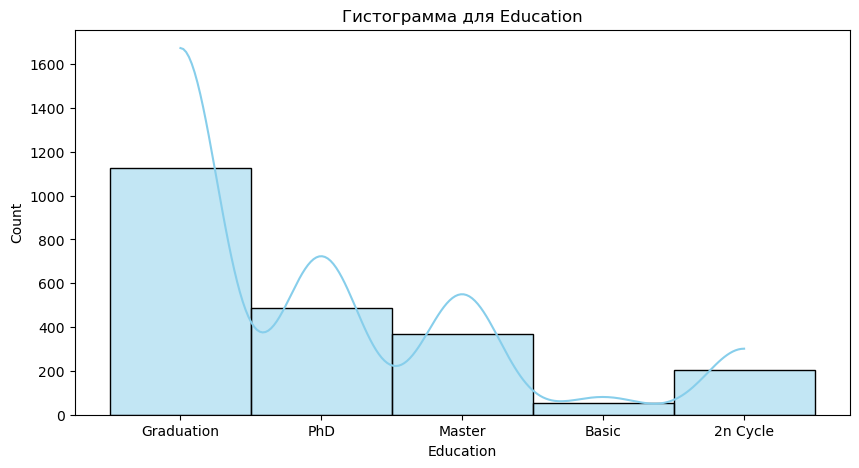

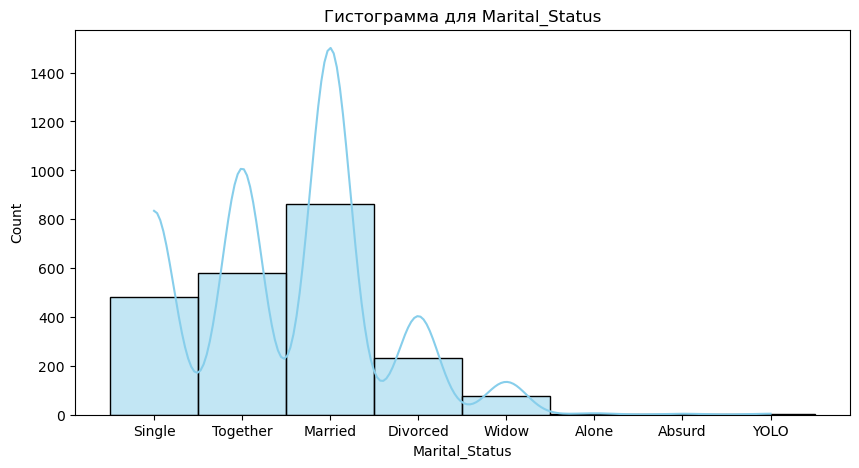

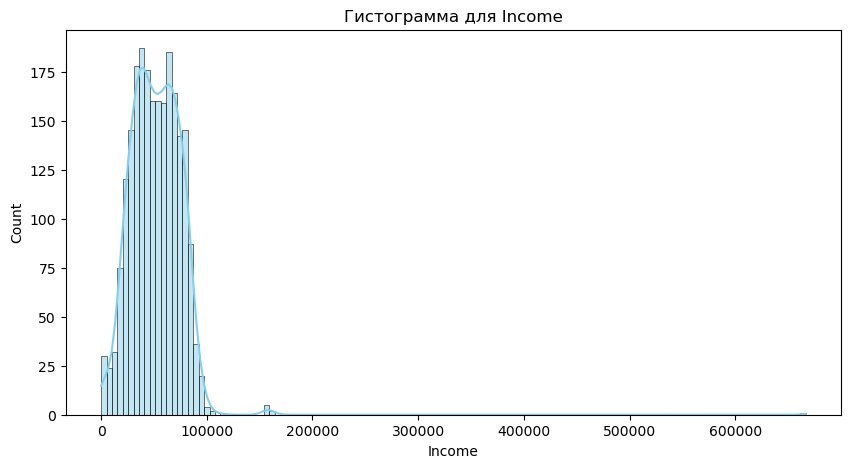

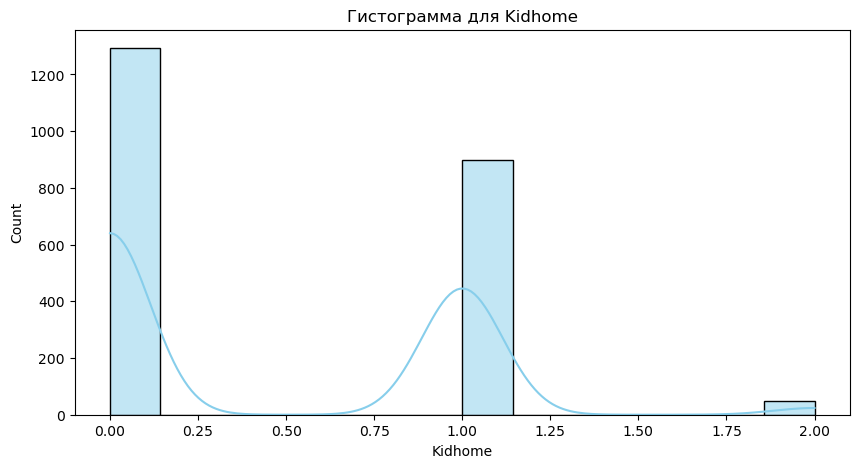

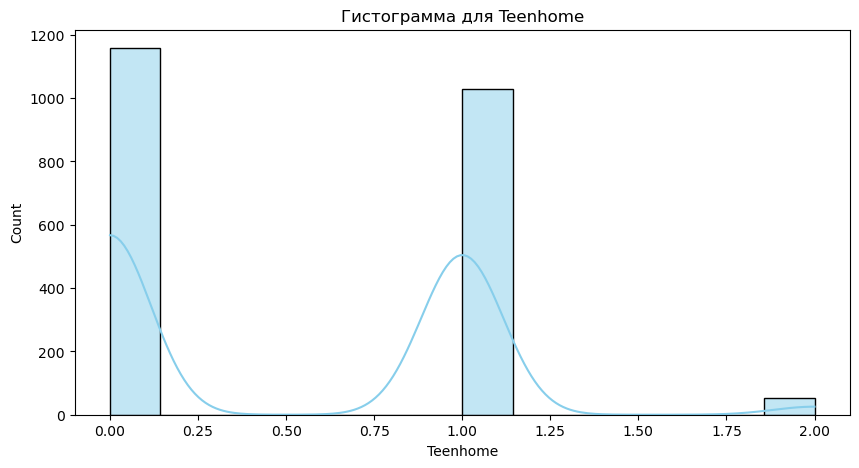

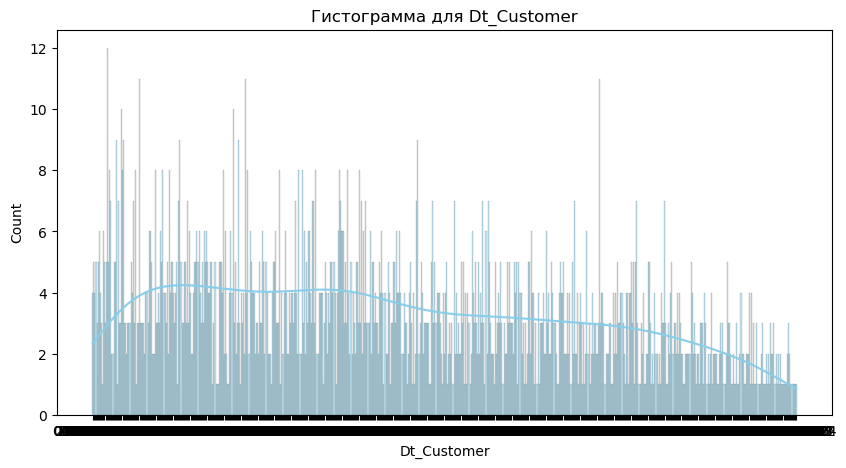

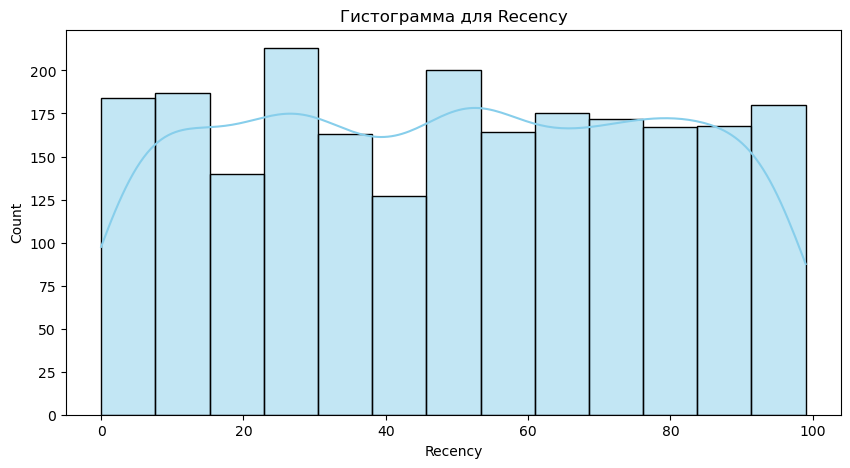

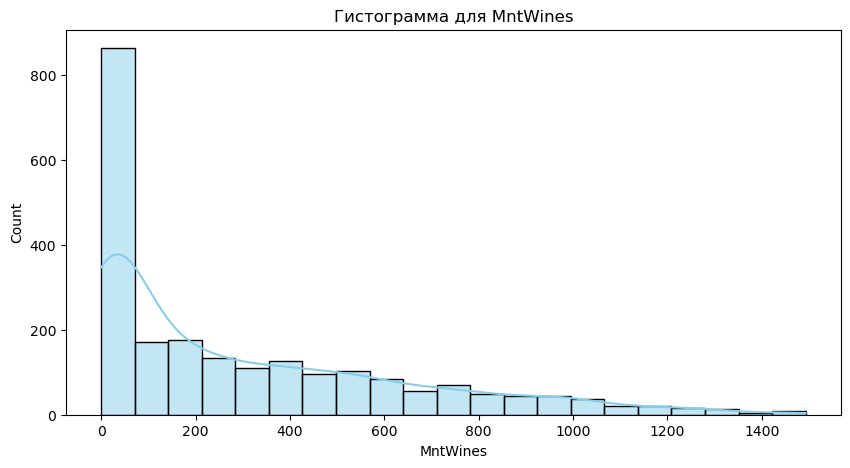

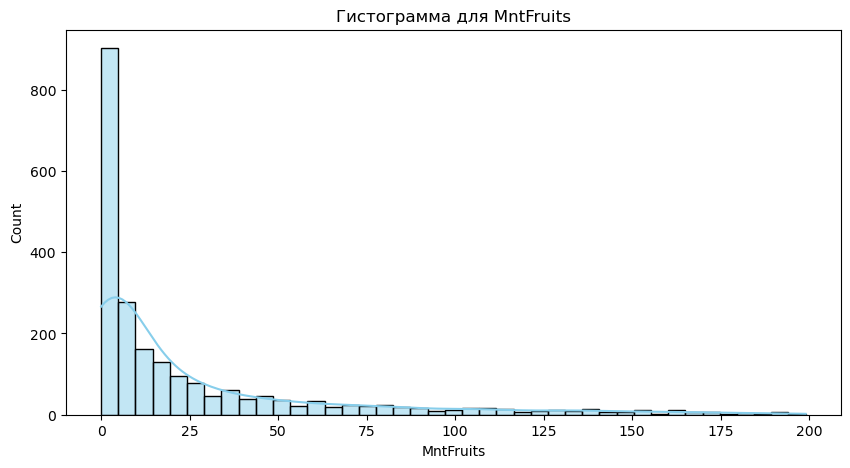

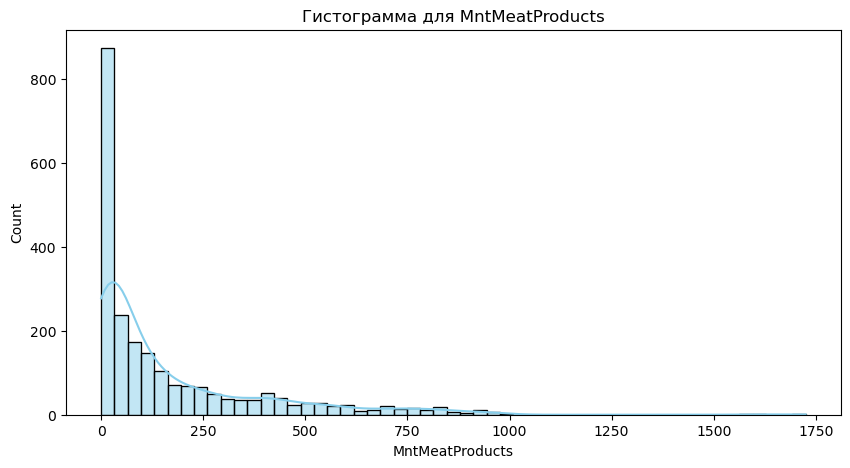

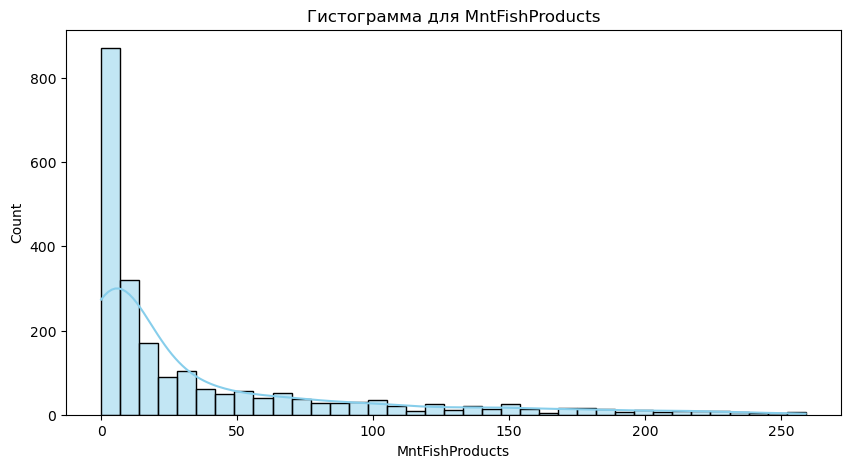

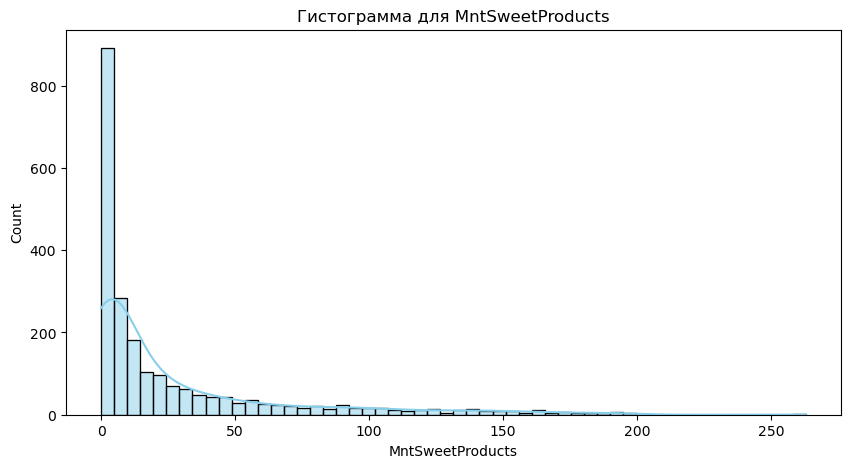

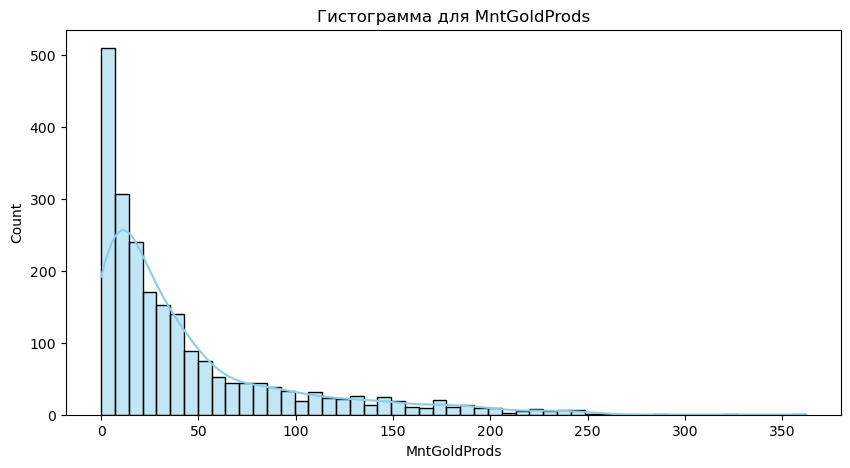

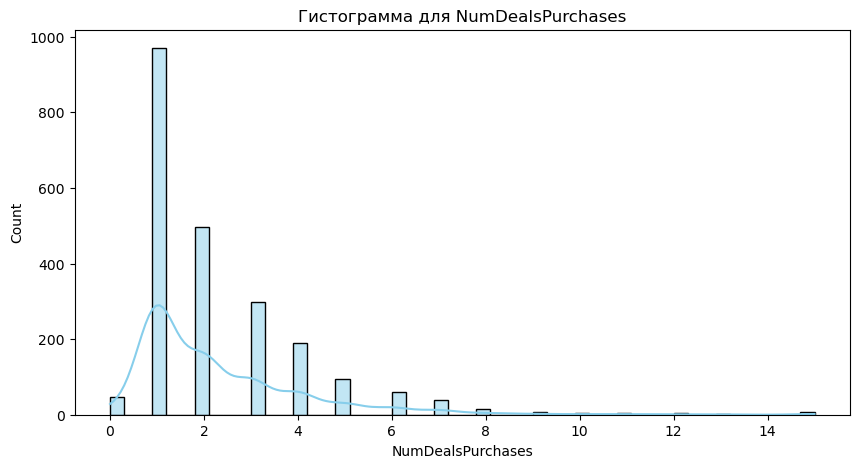

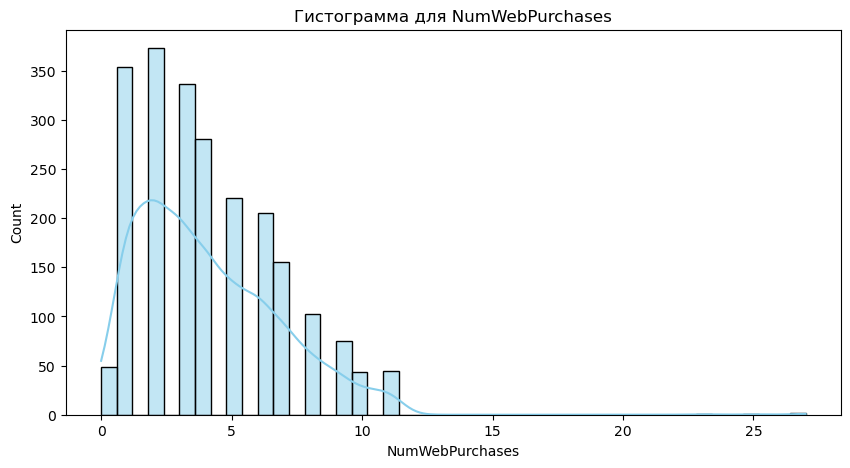

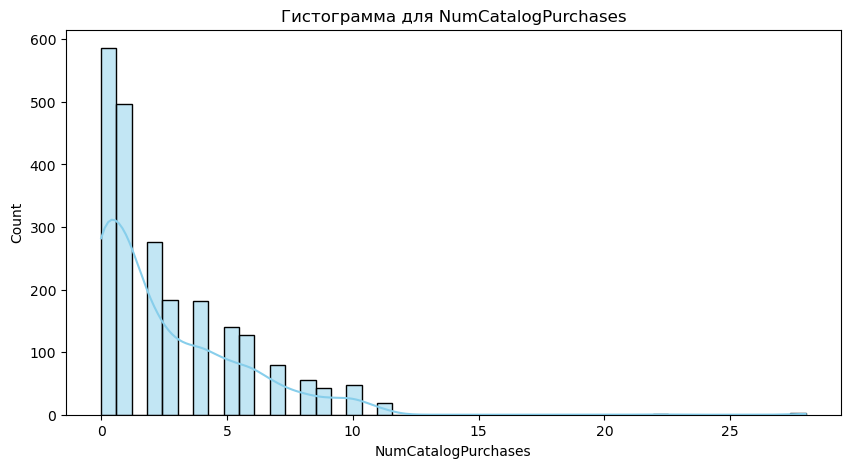

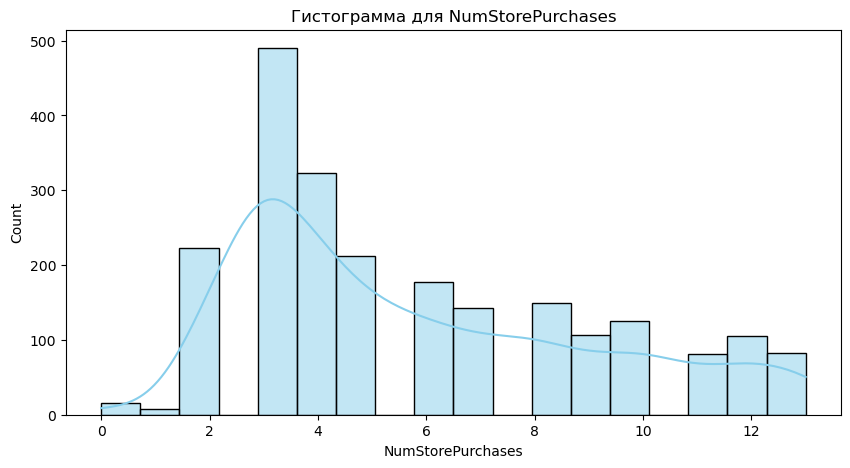

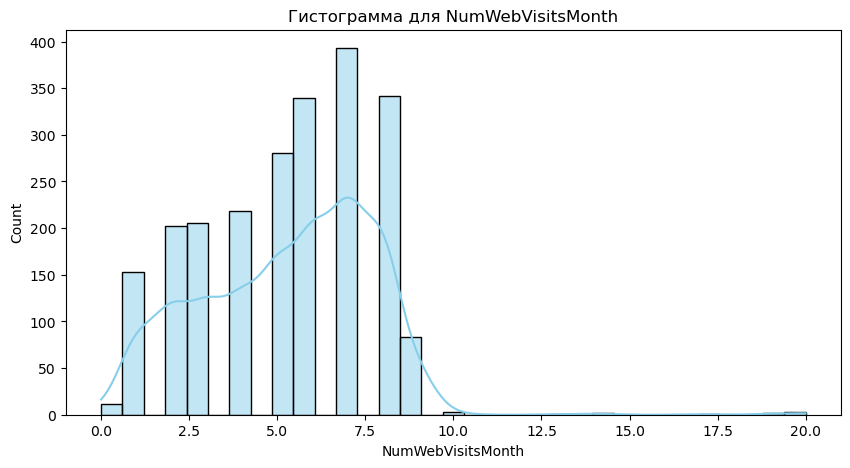

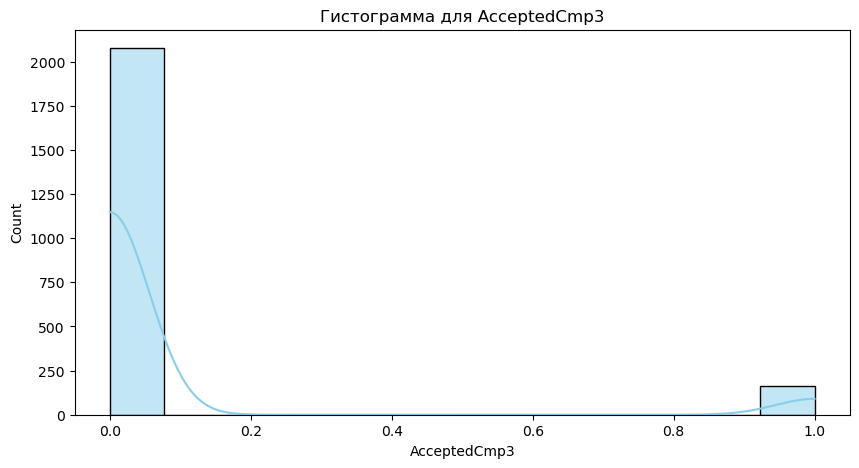

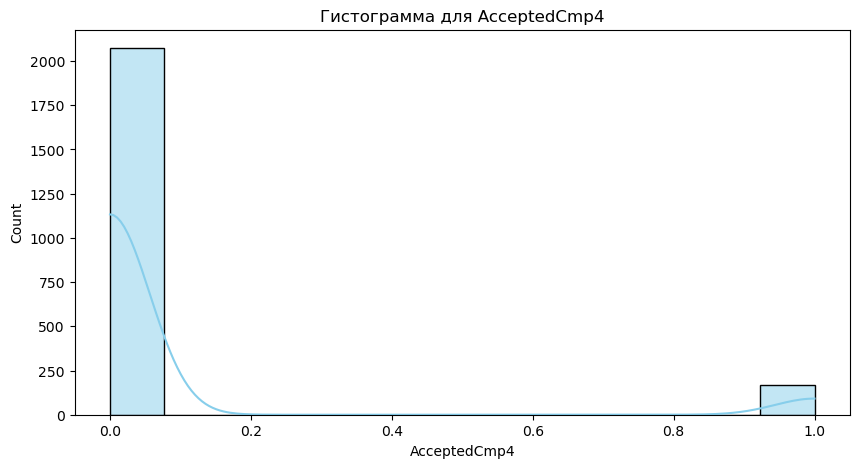

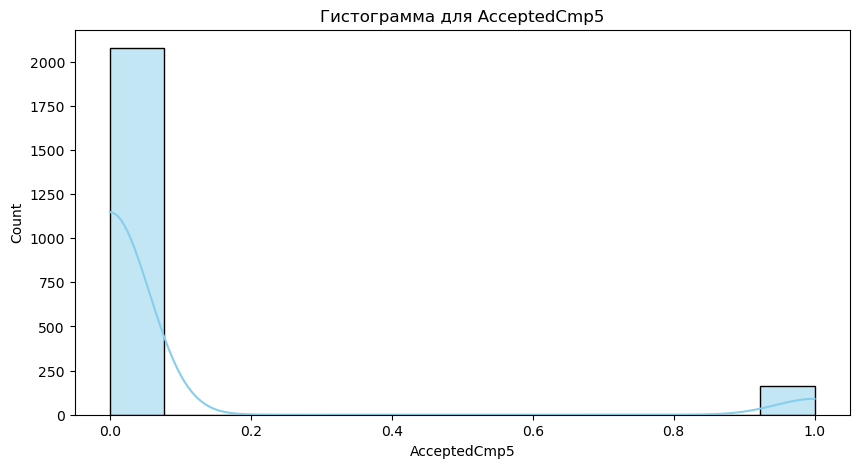

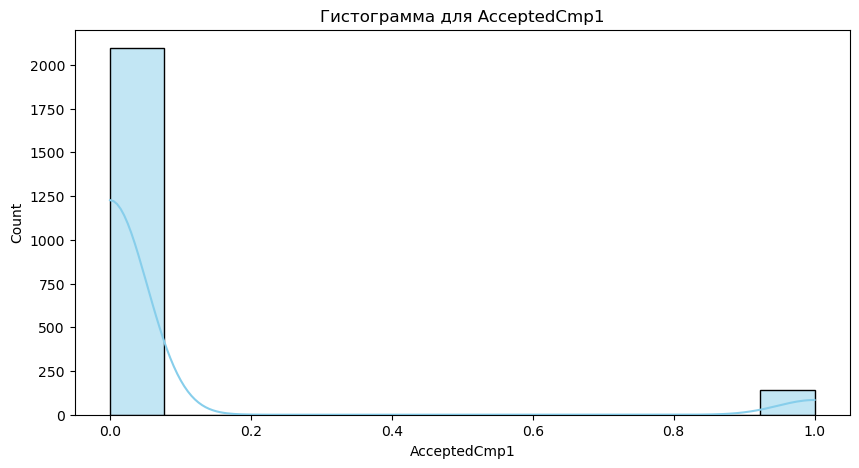

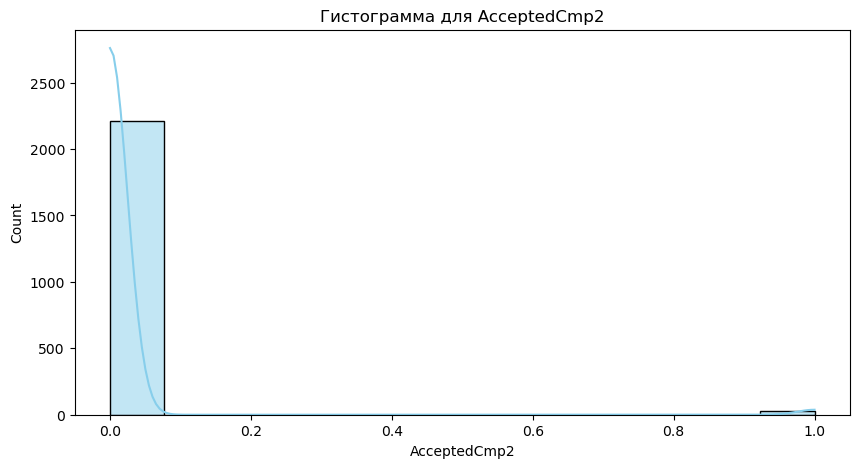

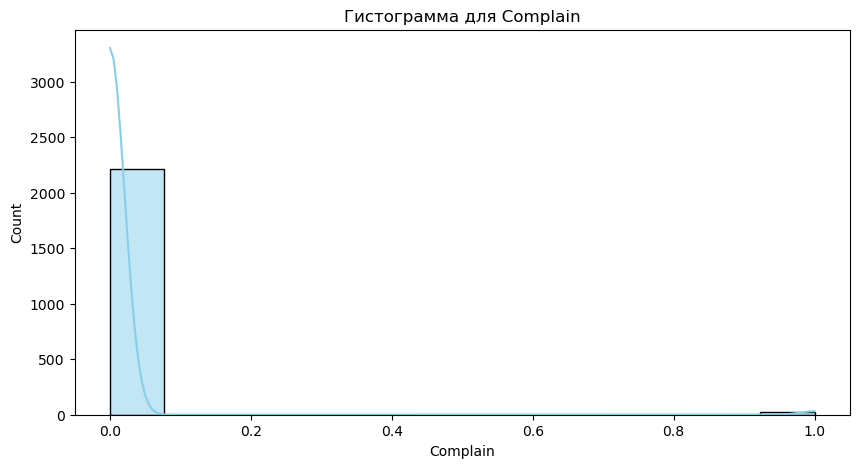

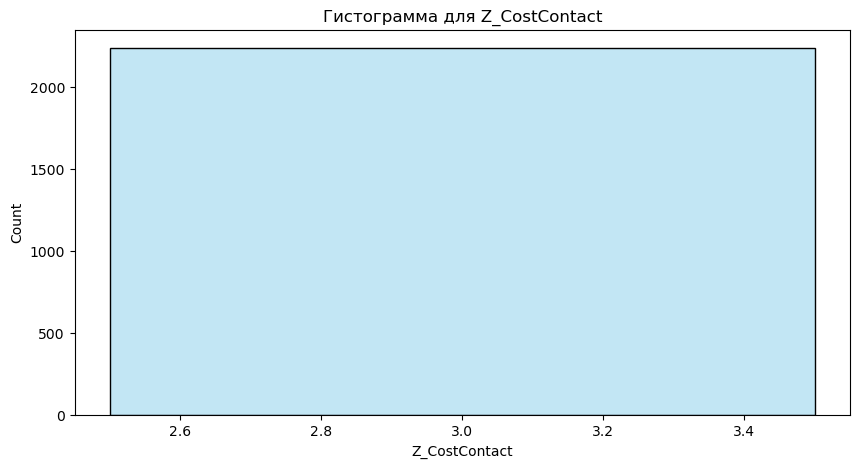

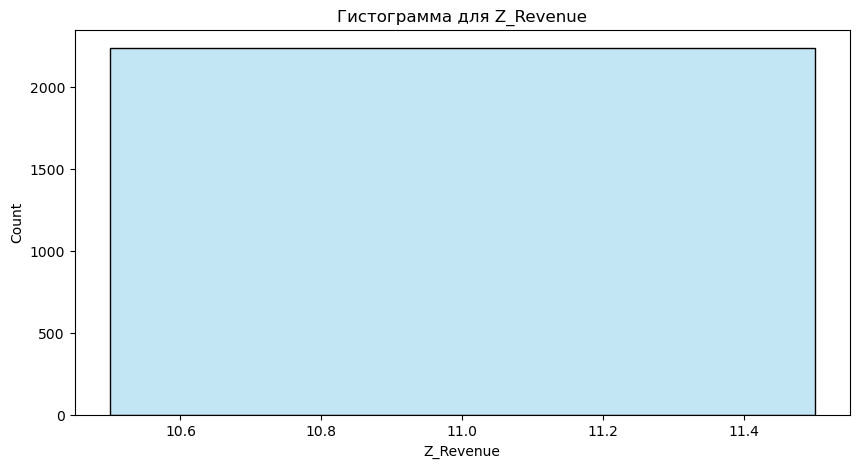

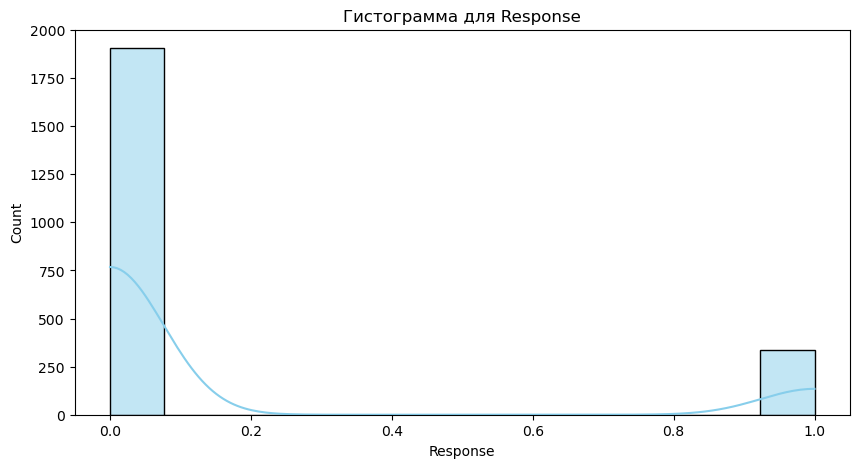

In [85]:
for column in df:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[column], kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Гистограмма для {column}')
    plt.show()

In [86]:
df.drop(['Dt_Customer','Education', 'Marital_Status'], axis= 1 , inplace= True ) 

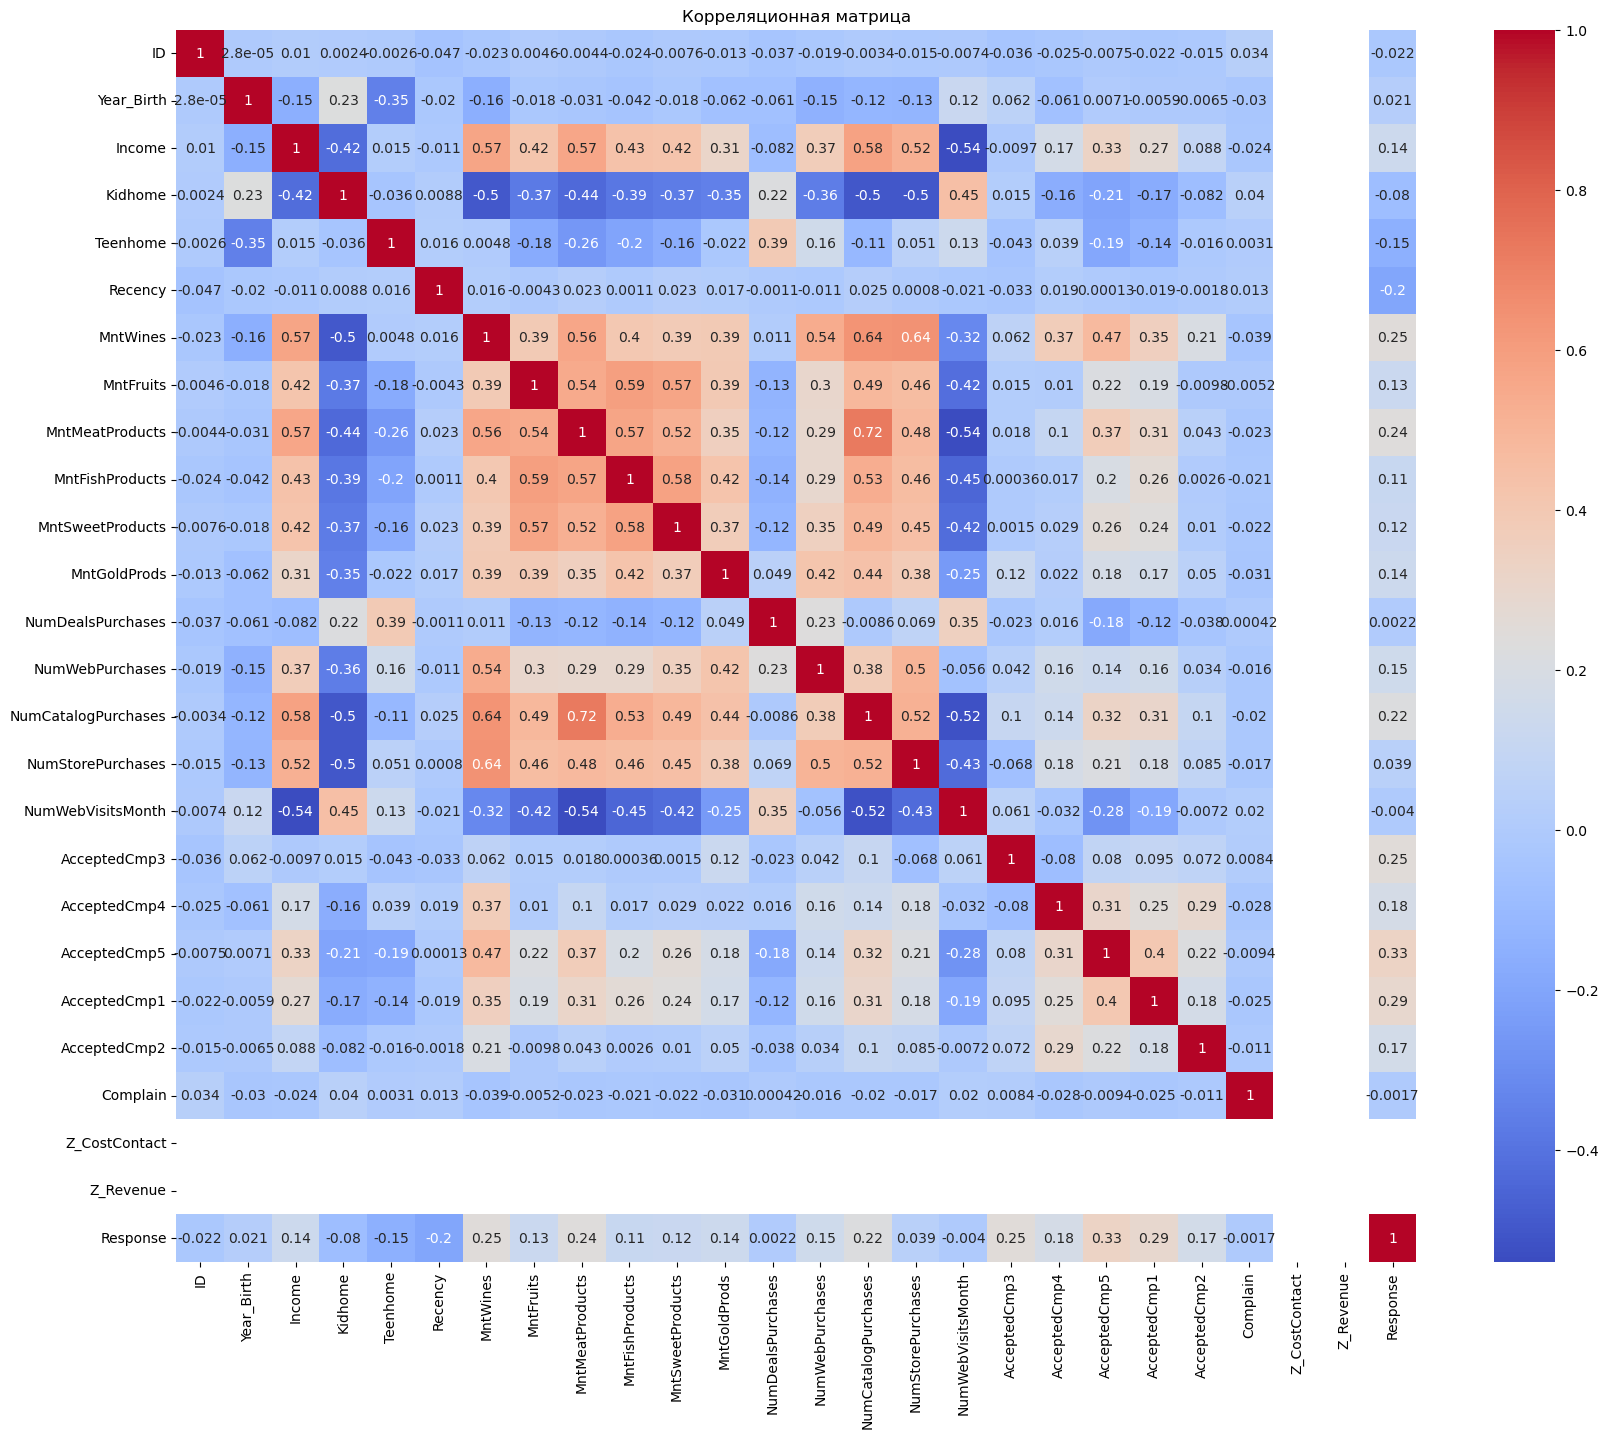

In [98]:
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

In [125]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [126]:
encoder = OneHotEncoder()
encoded_categorical = encoder.fit_transform(df_tmp[['Dt_Customer','Education', 'Marital_Status']]).toarray()

In [127]:
encoded_df = pd.DataFrame(encoded_categorical,
                          columns=encoder.get_feature_names_out(['Dt_Customer','Education', 'Marital_Status']))

In [128]:
print(encoded_df)

      Dt_Customer_01-01-2013  Dt_Customer_01-01-2014  Dt_Customer_01-02-2013  \
0                        0.0                     0.0                     0.0   
1                        0.0                     0.0                     0.0   
2                        0.0                     0.0                     0.0   
3                        0.0                     0.0                     0.0   
4                        0.0                     0.0                     0.0   
...                      ...                     ...                     ...   
2235                     0.0                     0.0                     0.0   
2236                     0.0                     0.0                     0.0   
2237                     0.0                     0.0                     0.0   
2238                     0.0                     0.0                     0.0   
2239                     0.0                     0.0                     0.0   

      Dt_Customer_01-02-2014  Dt_Custom

In [129]:
processed_df = pd.concat([df, encoded_df], axis=1)

In [130]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(processed_df)

In [131]:
from sklearn.decomposition import PCA

In [132]:
pca = PCA(n_components=2)
pca_df = pca.fit_transform(scaled_df)

In [133]:
from sklearn.cluster import KMeans

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

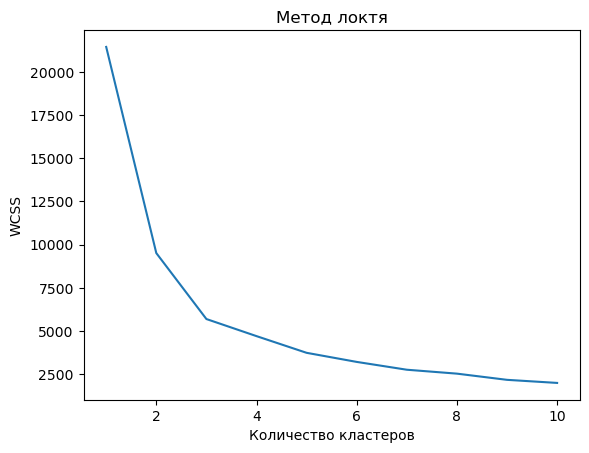

In [134]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.show()

In [135]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(pca_df)

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [136]:
labels = kmeans.predict(pca_df)

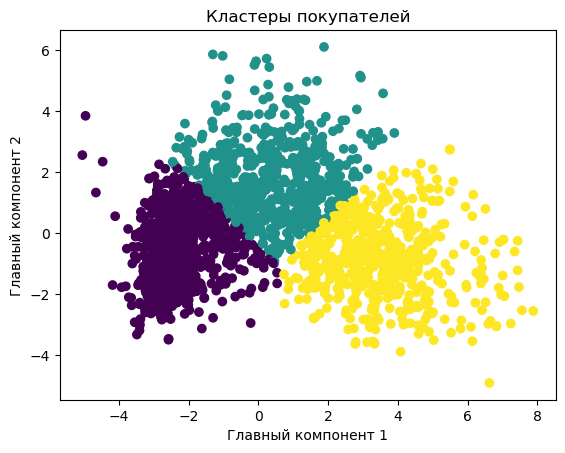

In [137]:
plt.scatter(pca_df[:, 0], pca_df[:, 1], c=labels, cmap='viridis')
plt.title('Кластеры покупателей')
plt.xlabel('Главный компонент 1')
plt.ylabel('Главный компонент 2')
plt.show()